In [1]:
import sklearn
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.filters import prewitt_h, prewitt_v
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from skimage.transform import resize
import pickle 
from nltk.corpus import words
from skimage.io import imread, imshow
from os import listdir

In [24]:
from os import listdir
FileNames = listdir("C:\\Users\\Talha Nadeem\\Intro to SE Project\\Datasets\\UTK Gender 2\\UTKFace")

In [25]:
FileNames

['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg',
 '100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_0_20170112213001988.jpg.chip.jpg',
 '100_1_0_20170112213303693.jpg.chip.jpg',
 '100_1_0_20170112215032192.jpg.chip.jpg',
 '100_1_0_20170117195420803.jpg.chip.jpg',
 '100_1_0_20170119212053665.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '100_1_2_20170112213615815.jpg.chip.jpg',
 '100_1_2_20170112222336458.jpg.chip.jpg',
 '101_0_0_20170112213500903.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '103_0_2_20170112213001988.jpg.chip.jpg',
 '105_0_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213021902.jpg.chip.jpg',
 '105_1_0_20170112213507183.jpg.chip.jpg',
 '105_1_1_20170112213303693.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_201701

In [44]:
labels = []
for i in FileNames:
    for j in range(len(i)):
        if i[j] == "_":
            if i[j+1] == "0":
                labels.append("Male")
                break
            else:
                labels.append("Female")
                break

In [47]:
labels

['Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',


In [11]:
# sorting the images
# import re

# nums = [re.findall('\d+',ss) for ss in FileNames] # extracts numbers from strings
# numsint = [int(*n) for n in nums] # returns 0 for the empty list corresponding to the word
# sorted_list = [x for y, x in sorted(zip(numsint, FileNames))] # sorts s based on the sorting of nums2
# FileNames = sorted_list
# FileNames

['0.jpg',
 '1.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '8.jpg',
 '9.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '15.jpg',
 '17.jpg',
 '19.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '43.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '52.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '80.jpg',
 '81.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '90.jpg',
 '91.jpg',
 '92.jpg',
 '93.jpg',
 '94.jpg',
 '95.jpg',
 '96.jpg',
 '97.jpg',
 '98.jpg',
 '99.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '111.jpg',
 '112.jpg',
 '114.jpg',
 '115.

In [48]:
len(FileNames)

23693

In [49]:
from PIL import Image
j = 0
MainData = {}
prevheight = 1000
prevwidth = 1000
for i in FileNames:
    filepath = "C:\\Users\\Talha Nadeem\\Intro to SE Project\\Datasets\\UTK Gender 2\\UTKFace" + "\\" + i

    image = imread(filepath, as_gray= True)    #reading, resizing and storing in a dictionary 
    newsize = (150, 128) 
    image_resize = resize(image, newsize)
    MainData[i] = image_resize
    
    

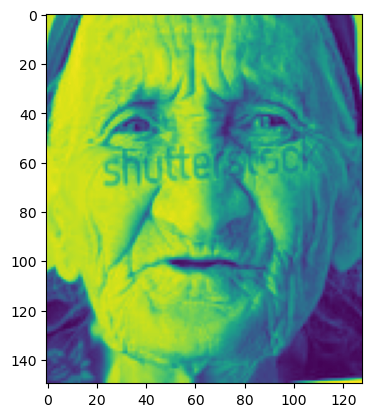

In [51]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

x = MainData[FileNames[2]]
plt.imshow(x)

In [52]:
# sending to a pickle file
with open('Faces.pickle', 'wb') as handle:
    pickle.dump(MainData, handle, protocol=pickle.HIGHEST_PROTOCOL)

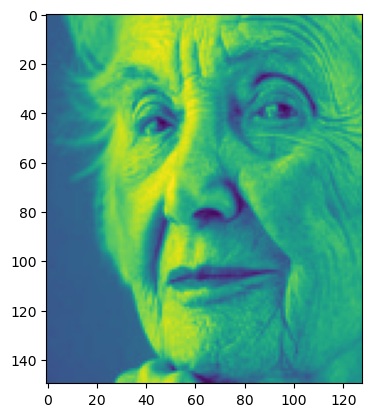

In [54]:
pickl = open(r"Faces.pickle", 'rb')
imag = pickle.load(pickl)
plt.imshow(imag[FileNames[4]])

In [58]:
len(MainData)

23693

In [60]:
type(MainData)

dict

In [63]:
from sklearn.preprocessing import MaxAbsScaler
images_scaled = list(MainData.values())
images_scaled
vect_img = {}
count = 0
for i in range(len(images_scaled)):
    scaler = MaxAbsScaler()
    scaled_val=scaler.fit_transform(images_scaled[i])
    vect_img[FileNames[count]] = scaled_val
    count = count + 1
vect_img

{'100_0_0_20170112213500903.jpg.chip.jpg': array([[0.83187728, 0.81674681, 0.74782622, ..., 0.77021641, 0.78571217,
         0.83433031],
        [0.81943962, 0.81305078, 0.77292889, ..., 0.77651121, 0.79695966,
         0.84899294],
        [0.79983721, 0.77875791, 0.76444776, ..., 0.77824393, 0.80889068,
         0.86002575],
        ...,
        [0.95021231, 0.94548165, 0.95165736, ..., 0.7529855 , 0.79830846,
         0.82655165],
        [0.95059933, 0.93621551, 0.94143314, ..., 0.7529855 , 0.79830846,
         0.82655165],
        [0.94668471, 0.92589406, 0.92586078, ..., 0.7529855 , 0.79830846,
         0.82655165]]),
 '100_0_0_20170112215240346.jpg.chip.jpg': array([[0.70788851, 0.7320092 , 0.75423811, ..., 0.79637548, 0.88019735,
         0.93582633],
        [0.71657718, 0.73032119, 0.75247531, ..., 0.79892279, 0.88020158,
         0.93582633],
        [0.72415476, 0.72786278, 0.74978563, ..., 0.80147009, 0.87947315,
         0.93443239],
        ...,
        [1.        , 1. 

In [64]:
len(vect_img)

23693

In [65]:
df_img_aug = pd.DataFrame()

df_img_aug['Transformed'] = list(vect_img.values()) #all images
df_img_aug['Gender'] = labels
df_img_aug

,Transformed,Gender
0,"[[0.8318772786627924, 0.8167468080243936, 0.74...",Male
1,"[[0.707888507493917, 0.7320092034623228, 0.754...",Male
2,"[[0.9239526930809399, 0.97071582340478, 0.9487...",Female
3,"[[0.9879435421092215, 0.9780096802601438, 0.96...",Female
4,"[[0.8719572701812734, 0.8916192529737399, 0.86...",Female
...,...,...
23688,"[[1.0, 1.0, 0.9999999999999999, 0.998172558032...",Female
23689,"[[0.7623317093968444, 0.06461661793031409, 0.1...",Female
23690,"[[0.8673776322372194, 0.8542248039558433, 0.84...",Female
23691,"[[0.04667150911944791, 0.051492677015033204, 0...",Female


In [66]:
print(df_img_aug['Transformed'][999].shape)

(150, 128)


In [68]:
# sending to a pickle file
with open('Transformed.pickle', 'wb') as handle:
    pickle.dump(df_img_aug, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [69]:
from skimage.feature import hog
from skimage import exposure
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v

lst_prewitt1 = {}
count = 0
for i in df_img_aug['Transformed']:
#     pre_hor = prewitt_h(i)
    ed_sobel = filters.sobel(i)
#     lst_prewitt1.append(pre_hor)
    lst_prewitt1[FileNames[count]] = ed_sobel
    count = count + 1

#     fd, hog_image = hog(i, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
print(len(lst_prewitt1))


img2 = []
# images_scaled = list(vect_img.values())
for i in lst_prewitt1.values():
    pixel_feat1 = i.flatten() # np.reshape(i, (256 * 128))
    img2.append(pixel_feat1)
img2[0].dtype

23693


dtype('float64')

In [70]:
img2

[array([0.01167654, 0.05280505, 0.00728638, ..., 0.05255765, 0.05201912,
        0.01997095]),
 array([0.01581983, 0.03093291, 0.02450175, ..., 0.07377023, 0.07681422,
        0.02969703]),
 array([0.02966401, 0.01387554, 0.03333372, ..., 0.13946027, 0.11149445,
        0.09839521]),
 array([0.0070243 , 0.01914136, 0.0160506 , ..., 0.02801689, 0.03270016,
        0.01666713]),
 array([0.01390312, 0.00228486, 0.07594726, ..., 0.0753809 , 0.06368536,
        0.01371789]),
 array([0.01852724, 0.0244218 , 0.01917018, ..., 0.        , 0.        ,
        0.        ]),
 array([2.21286642e-04, 6.78474319e-01, 6.21139495e-01, ...,
        8.13990961e-02, 3.57900134e-02, 7.22436092e-02]),
 array([0.03939094, 0.07297086, 0.0787925 , ..., 0.00682416, 0.00265067,
        0.00855973]),
 array([0.02340752, 0.05793251, 0.04120991, ..., 0.03915461, 0.01956588,
        0.02568995]),
 array([0.10678975, 0.19983601, 0.10228512, ..., 0.01565788, 0.0081202 ,
        0.01354019]),
 array([0.02414067, 0.0428

In [73]:
# sending to a pickle file
with open('finalready.pickle', 'wb') as handle:
    pickle.dump(img2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [78]:
for i in range(len(df_img_aug['Gender'])):
    if (df_img_aug['Gender'][i] == 'Male'):
        df_img_aug['Gender'][i] = 0
    else:
        df_img_aug['Gender'][i] = 1
        
lst = df_img_aug['Gender']
lab1 = lst.to_numpy(np.int32)
print(type(lab1))

<class 'numpy.ndarray'>


In [79]:
# sending to a pickle file
with open('labelsfinal.pickle', 'wb') as handle:
    pickle.dump(lab1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [80]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(img2, lab1, test_size = 0.20, random_state = 44)

In [81]:
X_train1 = np.array(X_train1, dtype = 'float64')
X_test1 = np.array(X_test1, dtype = 'float64')

In [82]:
print('Shape of X_train = ', X_train1.shape)
print('Shape of y_train = ', y_train1.shape)
print('Shape of X_test = ', X_test1.shape)
print('Shape of y_test = ', y_test1.shape)

Shape of X_train =  (18954, 19200)
Shape of y_train =  (18954,)
Shape of X_test =  (4739, 19200)
Shape of y_test =  (4739,)


In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train1, y_train1)

y_predrf1=neigh.predict(X_test1)
print('Accuracy:', accuracy_score(y_test1, y_predrf1))
print("F1 Score: ",f1_score(y_test1, y_predrf1,average='micro',)) 
print(classification_report(y_test1, y_predrf1))

Accuracy: 0.7115425195188858
F1 Score:  0.7115425195188858
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      2525
           1       0.68      0.71      0.70      2214

    accuracy                           0.71      4739
   macro avg       0.71      0.71      0.71      4739
weighted avg       0.71      0.71      0.71      4739



D:\Anacondaa\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [94]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(solver = 'auto').fit(X_train1, y_train1)
RidgeClass1 = clf.predict(X_test1)

print ("Accuracy : " , accuracy_score(y_test1,RidgeClass1)*100)  
print("Report : \n", classification_report(y_test1, RidgeClass1))
print("F1 Score : ",f1_score(y_test1, RidgeClass1, average='macro')*100)

MemoryError: Unable to allocate 2.71 GiB for an array with shape (18954, 19200) and data type float64

In [92]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train1, y_train1)

In [93]:
y_pred_dtc = dtc.predict(X_test1)

print ("Accuracy : " , accuracy_score(y_test1,y_pred_dtc)*100)  
print("Report : \n", classification_report(y_test1, y_pred_dtc))
print("F1 Score : ",f1_score(y_test1, y_pred_dtc, average='macro')*100)

Accuracy :  64.10635155096011
Report : 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      2525
           1       0.62      0.62      0.62      2214

    accuracy                           0.64      4739
   macro avg       0.64      0.64      0.64      4739
weighted avg       0.64      0.64      0.64      4739

F1 Score :  63.958037540064126


In [95]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=2000, tol=0.001, learning_rate = 'adaptive', eta0 = 2700)
sgdc.fit(X_train1, y_train1)

score = sgdc.score(X_train1, y_train1)
ypred_sgdc = sgdc.predict(X_test1)
cr = classification_report(y_test1, ypred_sgdc)

In [96]:
print ("Accuracy : " , accuracy_score(y_test1,ypred_sgdc)*100)  
print("Report : \n", classification_report(y_test1, ypred_sgdc))
print("F1 Score : ",f1_score(y_test1, ypred_sgdc, average='macro')*100)

Accuracy :  77.21038193711753
Report : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      2525
           1       0.75      0.77      0.76      2214

    accuracy                           0.77      4739
   macro avg       0.77      0.77      0.77      4739
weighted avg       0.77      0.77      0.77      4739

F1 Score :  77.1483037634495


In [97]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train1, y_train1)
clf.predict(X_test1)
clf.score(X_train1, y_train1)

D:\Anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.933787063416693

In [107]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='sag', tol = 0.0009, C = 5.0).fit(X_train1, y_train1)
p=clf.predict(X_test1)

D:\Anacondaa\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print ("Accuracy : " , accuracy_score(y_test1,p)*100)  
print("Report : \n", classification_report(y_test1, p))
print("F1 Score : ",f1_score(y_test1, p, average='micro')*100)

Accuracy :  77.97003587254694
Report : 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      2525
           1       0.76      0.78      0.77      2214

    accuracy                           0.78      4739
   macro avg       0.78      0.78      0.78      4739
weighted avg       0.78      0.78      0.78      4739

F1 Score :  77.97003587254694
